# Assignment: Ionosphere Data Problem


Assignment: Ionosphere Data Problem
Dataset Description:
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

Attribute Information:
All 34 are continuous
The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.




Data Set Characteristics:  

Multivariate

Number of Instances:

351

Area:

Physical

Attribute Characteristics:

Integer,Real

Number of Attributes:

34

Date Donated

N/A

Associated Tasks:

Classification

Missing Values?

N/A

Number of Web Hits:

N/A

WORKFLOW :
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
Shuffle the data if needed.
Standardized the Input Variables. Hint: Centeralized the data
Split into 60 and 40 ratio.
Encode labels.
Model : 1 hidden layers including 16 unit.
Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
Train the Model with Epochs (100).
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 92%
Evaluation Step
Prediction


# import all Libaries

In [97]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
import pandas as pd
import tensorflow  as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the ionosphere dataset

In [98]:
data = pd.read_csv('ionosphere_data.csv')
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# sumarize the shape

In [99]:
 data.shape

(351, 35)

# Checking Missing Values

In [126]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

# show summary statistics

In [100]:
print(data.describe())

         feature1  feature2    feature3    feature4    feature5    feature6  \
count  351.000000     351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738       0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155       0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000       0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000       0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000       0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000       0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000       0.0    1.000000    1.000000    1.000000    1.000000   

         feature7    feature8    feature9   feature10  ...   feature25  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     0.550095    0.119360    0.511848    0.181345  ...    0.396135   
std      0.492654    0.520750    0.507066    0.483851  ...    0.57

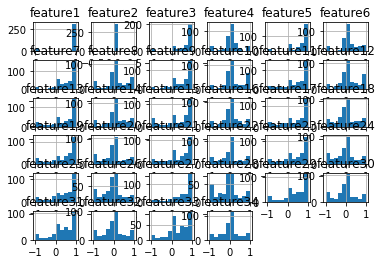

In [101]:
# plot histograms
data.hist()
pyplot.show()

# split into input and output columns

In [102]:
x, y = data.values[:, :-1], data.values[:, -1]

# Ensure all data are floating point values

In [103]:
x = x.astype('float32')

# Encode strings to integer

In [104]:
y = LabelEncoder().fit_transform(y)

# split into train and test datasets

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Determine the number of input featrues

In [106]:
n_features = x.shape[1]

# Define model

In [113]:
model = Sequential()
model.add(Dense(40, activation = "relu", kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation = 'relu' ))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

# compile the model

In [114]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

# Fit the model

In [115]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(x_test,y_test))

# predict test set

In [116]:
yhat = model.predict_classes(x_test)

# evaluate predictions

In [117]:
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.957


# plot learning Curves

AttributeError: module 'matplotlib.pyplot' has no attribute 'lengend'

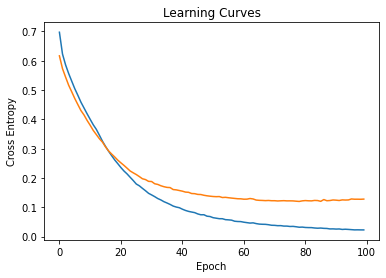

In [118]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.lengend()
pyplot.show()